In [1]:
# This notebook checks the AO consistency between NWChem and Multiwfn

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
os.chdir("/Users/victormanuelfreixaslemus/Desktop/Projects/Git_portafolio/CPA/Plotting_chiral_response")
from scripts.get_AO_overlap_from_NWChem import get_AO_overlap_from_NWChem
from scripts.get_AO_overlap_from_Multiwfn import get_AO_overlap_from_Multiwfn
from scripts.make_NWChem_Multiwfn_AO_index_permutation_matrix import make_NWChem_as_Multiwfn_AO_index_permutation_matrix
from scripts.make_NWChem_Multiwfn_AO_index_permutation_matrix import make_Multiwfn_as_NWChem_AO_index_permutation_matrix

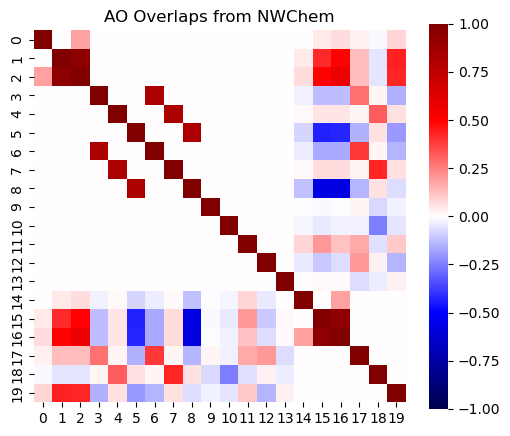

In [2]:
#   Plotting AO overlaps from NWChem

nwchemFile = "examples/phenylglycine_hydroxyl_oxygen_K_edge_2nd/plot.out"
aoNWChem = get_AO_overlap_from_NWChem(nwchemFile)

cmap = plt.cm.seismic
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.figure(figsize=(6, 5))
sns.heatmap(aoNWChem[:20,:20], cmap=cmap, norm=norm, cbar=True, square=True)
plt.title("AO Overlaps from NWChem")
plt.show()

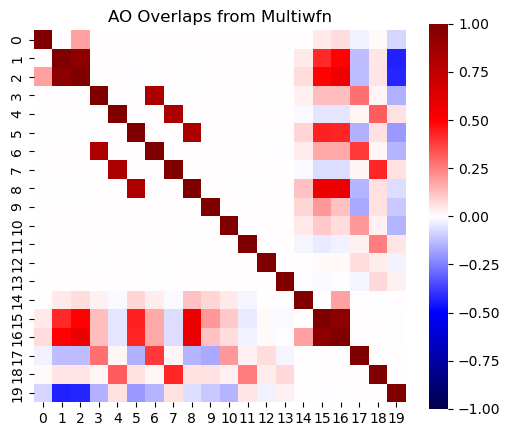

In [3]:
#   Plotting AO overlaps from Multiwfn

Nbf = 199
multiwfnIntegralFile = "examples/phenylglycine_hydroxyl_oxygen_K_edge_2nd/intmat.txt"
aoMultiwfn = get_AO_overlap_from_Multiwfn(Nbf, multiwfnIntegralFile)

cmap = plt.cm.seismic
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.figure(figsize=(6, 5))
sns.heatmap(aoMultiwfn[:20,:20], cmap=cmap, norm=norm, cbar=True, square=True)
plt.title("AO Overlaps from Multiwfn")
plt.show()

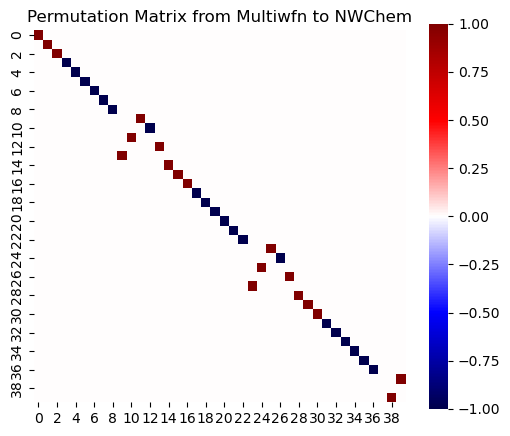

In [4]:
# Generating the permutation matrix to be used in the couplings calculations

moldenFile = "examples/phenylglycine_hydroxyl_oxygen_K_edge_2nd/molden_template.molden"
dim = 2

permMatrix = make_Multiwfn_as_NWChem_AO_index_permutation_matrix(moldenFile, dim)

cmap = plt.cm.seismic
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.figure(figsize=(6, 5))
sns.heatmap(permMatrix[:40,:40], cmap=cmap, norm=norm, cbar=True, square=True)
plt.title("Permutation Matrix from Multiwfn to NWChem")
plt.show()

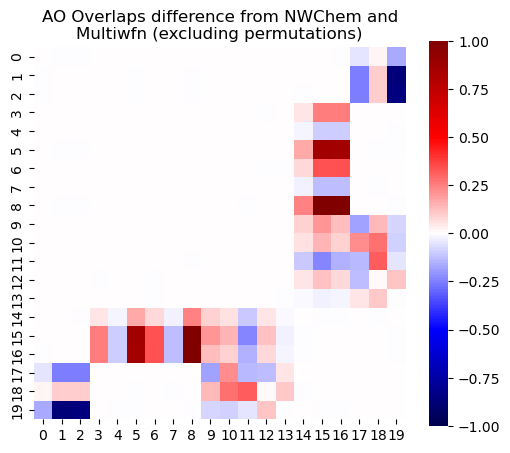

In [5]:
# Plotting the difference of AO overlaps from NWChem and Multiwfn (without permutations)

cmap = plt.cm.seismic
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.figure(figsize=(6, 5))

sns.heatmap((aoMultiwfn[:20, :20] - aoNWChem[:20, :20]), norm = norm, cmap=cmap, cbar=True, square=True)
plt.title("AO Overlaps difference from NWChem and\nMultiwfn (excluding permutations)")
plt.show()

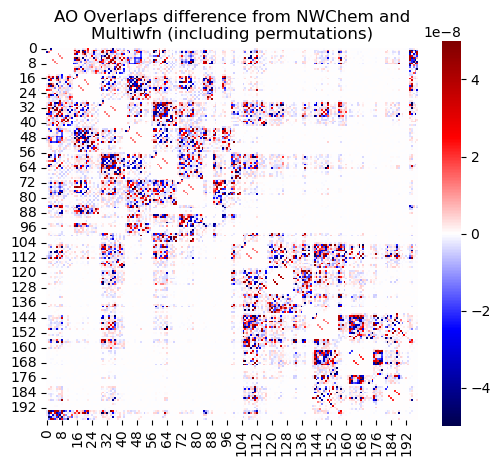

In [6]:
# Plotting corrected AO overlaps from Multiwfn

aoMultiwfnCorrected = permMatrix.T @ aoMultiwfn @ permMatrix

cmap = plt.cm.seismic
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.figure(figsize=(6, 5))

sns.heatmap((aoMultiwfnCorrected - aoNWChem), cmap=cmap, cbar=True, square=True)
plt.title("AO Overlaps difference from NWChem and\nMultiwfn (including permutations)")
plt.show()

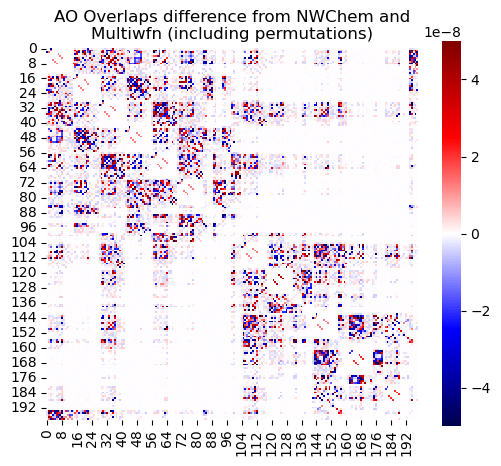

In [7]:
# Plotting corrected AO overlaps from NWChem

permMatrix = make_NWChem_as_Multiwfn_AO_index_permutation_matrix(moldenFile, dim)
aoNWChemCorrected = permMatrix.T @ aoNWChem @ permMatrix

cmap = plt.cm.seismic
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.figure(figsize=(6, 5))

sns.heatmap((aoMultiwfn - aoNWChemCorrected), cmap=cmap, cbar=True, square=True)
plt.title("AO Overlaps difference from NWChem and\nMultiwfn (including permutations)")
plt.show()